In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import hotspot
from statsmodels.stats import weightstats as stests
import mplscience
from matplotlib import rcParams
mpl.rcParams['pdf.fonttype'] = 42

Global seed set to 0
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:202: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:302: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(


In [2]:
from sklearn.decomposition import PCA

In [ ]:
adata = scvi.data.read_h5ad("NEWonlymRNA_scVI_evo1234exp_g20230729_FINAL.h5ad")
adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,sample,n_counts,...,_scvi_labels,1r,2r,3r,4r,leiden_scVI,_scvi_raw_norm_scaling,leiden_scVI2,leiden_scVI_final,cluster
BS22735A_bc1_10_bc2_10_bc3_17,93,4.543295,123.0,4.820282,65.040650,100.000000,100.0,100.0,1r,123.0,...,0,1,0,0,0,1,81.300812,5,1,L
BS22735A_bc1_10_bc2_10_bc3_25,110,4.709530,145.0,4.983607,58.620690,93.103448,100.0,100.0,1r,145.0,...,0,1,0,0,0,0,68.965515,3,0,L
BS22735A_bc1_10_bc2_10_bc3_38,72,4.290459,85.0,4.454347,74.117647,100.000000,100.0,100.0,1r,85.0,...,0,1,0,0,0,1,117.647064,5,1,L
BS22735A_bc1_10_bc2_10_bc3_59,56,4.043051,66.0,4.204693,90.909091,100.000000,100.0,100.0,1r,66.0,...,0,1,0,0,0,1,151.515152,1,1,L
BS22735A_bc1_10_bc2_10_bc3_7,30,3.433987,41.0,3.737670,100.000000,100.000000,100.0,100.0,1r,41.0,...,0,1,0,0,0,4,243.902435,0,4,L


In [3]:
adata.obs['cluster'].value_counts()

L    230643
M     40747
S      6043
Name: cluster, dtype: int64

In [ ]:
import pickle
with open('new_230724_PETRI/modules/hotspot.pkl', 'rb') as f:
    hs = pickle.load(f)

In [7]:
hs.modules[hs.modules==13].index

Index(['isaA', 'atl', 'ssaA', 'guaB', 'sle1', 'pbuX', 'guaA',
       'SAUSA300_RS03490', 'SAUSA300_RS13900', 'nptA', 'lyrA', 'metS', 'gltX',
       'nhaC', 'xpt'],
      dtype='object')

In [8]:
hs.modules.loc['isaA']=-1
hs.modules.loc['ssaA']=-1
hs.modules.loc['sle1']=-1
hs.modules.loc['SAUSA300_RS13900']=-1

In [43]:
plt.style.use({'axes.grid': False})


In [16]:
module_scores = hs.calculate_module_scores()


Computing scores for 36 modules...


100%|██████████| 36/36 [02:29<00:00,  4.16s/it]


In [17]:
module_cols = []
for c in module_scores.columns:
    key = f"Module {c}"
    adata.obs[key] = module_scores[c]
    module_cols.append(key)

In [18]:
del module_scores

In [72]:
import os
sns.set_style("whitegrid", {'axes.grid' : False})

# Define the list of modules
modules = [f"Module {i}" for i in range(1, 37)]

# Create a directory to save the plots
output_dir = "figures"

# Loop through each module and generate the plots
for module in modules:
    # Create the plot
    g = sns.catplot(
        data=adata.obs, kind="bar",
        x="sample", y=module, col="cluster", 
        errorbar="se",
        hue='sample', palette=["#EFDCCC", "#F29090", "#ADD4DD", "#B9C0EA"], 
        edgecolor='black',
        height=4, aspect=.6,
    )
    
    # Save the plot as a PDF
    plot_filename = os.path.join(output_dir, f"{module}facet.pdf")
    plt.savefig(plot_filename, dpi=1000)

    # Close the plot to free memory
    plt.close()

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn

In [ ]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(adata, 
           vmax='p90',
           vcenter='p50',
           vmin='p10',
           color=module_cols, frameon=False, cmap="coolwarm",
          save="Module_score.pdf"
          )

All the cells together

In [23]:
#Group by cluster and calculate the mean of each module
cluster_module_avg = adata.obs.groupby('cluster')[module_cols].mean()
cluster_module_avg

,Module 1,Module 2,Module 3,Module 4,Module 5,Module 6,Module 7,Module 8,Module 9,Module 10,...,Module 27,Module 28,Module 29,Module 30,Module 31,Module 32,Module 33,Module 34,Module 35,Module 36
cluster,,,,,,,,,,,,,,,,,,,,,
L,-0.052671,-0.057685,0.023869,-0.042151,-0.104796,0.095572,0.051998,-0.069444,0.057107,0.086647,...,0.018183,0.009302,0.012708,-0.024505,0.016158,-0.049164,0.004776,-0.000790,0.036820,-0.016372
M,-0.054975,-0.054921,-0.567662,-0.044921,0.715765,-0.437089,-0.239910,0.345695,-0.197934,-0.394990,...,-0.114751,-0.035105,-0.099845,0.083968,-0.086690,0.128078,-0.013616,-0.004759,-0.124547,-0.023203
S,2.380980,2.571984,2.916656,1.911676,-0.826549,-0.700473,-0.366915,0.319504,-0.844971,-0.643701,...,0.079756,-0.118330,0.188215,0.369107,-0.032175,1.012827,-0.090473,0.062237,-0.565493,0.781338


In [ ]:
df= cluster_module_avg
pca = PCA(n_components=3)  # Adjust the number of components as needed
pca_results = pca.fit_transform(df)
arctan = pd.DataFrame((np.arctan2(np.array(pca.components_[0,:]), np.array(pca.components_[1,:]))),
                    index=df.columns,
                   columns=['arctan'])
sorted_df = df.loc[:,arctan.sort_values(by="arctan").index]
sorted_df

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df, 
            annot=True,
            vmin=-1, vmax=1,
            cmap="coolwarm")
plt.grid(False)

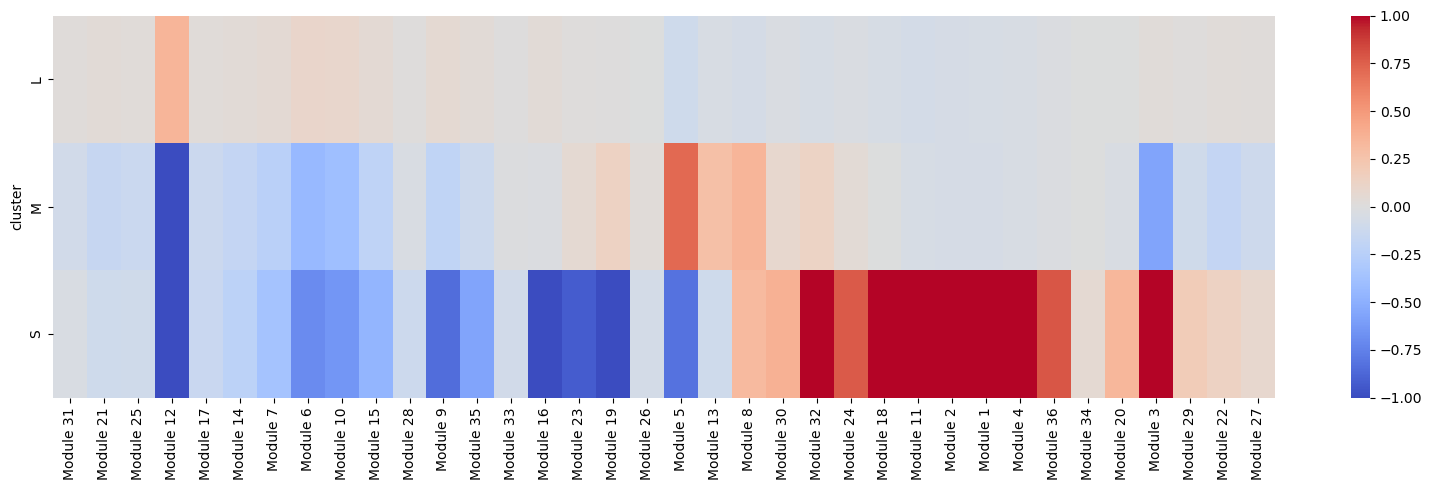

In [25]:
n=35; #The first 8 columns should be moved to the back
cols = sorted_df.columns.tolist()

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df[cols[n:] + cols[:n]], 
            annot=False,
            vmin=-1, vmax=1, 
            cmap="coolwarm")
plt.grid(False)
plt.tight_layout()
plt.savefig("all_zavit_cluster_module_score.pdf")

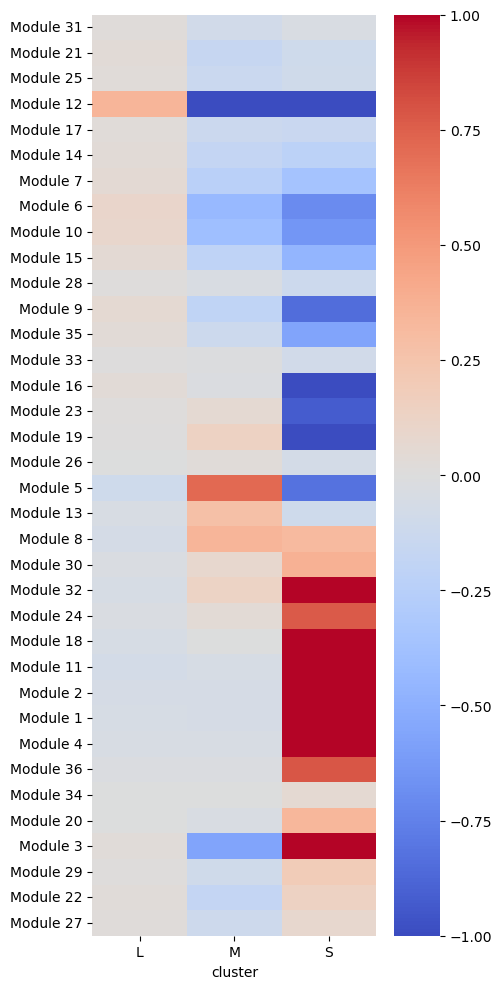

In [32]:
plt.figure(figsize = (5,10))
sns.heatmap(sorted_df[cols].transpose(), 
            annot=False,
            vmin=-1, vmax=1,
            cmap="coolwarm")
plt.grid(False)
plt.tight_layout()
plt.savefig("cluster_zavit_module_score_90.pdf")

In [33]:
from matplotlib.colors import ListedColormap
# your palette
palette = ['#B5C3D7','#B6C9C0','#DCDE99','#DDCCDE','#E1B3B0','#DFC97F','#D7A6A2','#AE7674','#C7DEBE',
           '#D2D6DE','#E2A27A','#AFC8DE','#8EAFC4','#7B9EB1','#C3A3C2','#E8C7C3',
           '#6A8E9F','#4C6E7D','#BDDEDE','#9AC9CC','#B1D4A7','#F4D35E','#F4A261','#E4AEAE','#BCA48E',
           "#E38871",'#D6BE98','#DCCECB','#BE938D',
           '#8282AF',"#A2677C",'#DECDAE',"#E3A1C8",'#E8CF72','#BEB5A4',
           '#BDD8FC']

# Build the matrix you’re plotting (transpose like you already do)
mat = sorted_df[cols].transpose()   # rows correspond to items in `cols` (e.g., module IDs)
row_labels = mat.index.to_list()

# Map each row to a color (in the *current row order* of the heatmap)
if len(row_labels) > len(palette):
    raise ValueError(f"Need at least {len(row_labels)} colors but palette has {len(palette)}.")
row_to_color = {lab: palette[i] for i, lab in enumerate(row_labels)}
row_color_list = [row_to_color[lab] for lab in row_labels]

# --- Plot: heatmap + matched right-side color bar ---
fig = plt.figure(figsize=(5.8, 10))  # a little wider to fit the bar
gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[20, 1], wspace=0.05)

ax_heat = fig.add_subplot(gs[0, 0])
sns.heatmap(
    mat,
    ax=ax_heat,
    annot=False,
    vmin=-1, vmax=1,
    cmap="coolwarm",
    cbar=False
)
ax_heat.grid(False)

# Right-side annotation bar (same height as heatmap)
ax_anno = fig.add_subplot(gs[0, 1])

# Create a (n_rows x 1) array of indices for imshow
idx = np.arange(len(row_labels)).reshape(-1, 1)
cmap = ListedColormap(row_color_list)

# Use imshow; origin='upper' matches seaborn’s default y order
ax_anno.imshow(idx, aspect='auto', cmap=cmap, vmin=0, vmax=len(row_labels)-1, origin='upper')

# Remove ticks/frames on the annotation bar
ax_anno.set_xticks([])
ax_anno.set_yticks([])
for spine in ax_anno.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("cluster_zavit_module_score_90_with_right_annotation.pdf", dpi=300)
plt.close()


/var/folders/51/n69nfv650kj287fzxg37b8r80000gn/T/ipykernel_51428/1188941347.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [34]:
from scipy.stats import rankdata

#https://github.com/atarashansky/LightGOEA
def log_factorial(n):
    return np.log(np.arange(1,n+1)).sum()
def log_binomial(n,k):
    return log_factorial(n) - (log_factorial(k) + log_factorial(n-k))

def GOEA(target_genes,GENE_SETS,df_key='GO',goterms=None,fdr_thresh=0.25,p_thresh=1e-3): 
   
    # identify all genes found in `GENE_SETS`
    
    if isinstance(GENE_SETS,pd.DataFrame):
        print('Converting DataFrame into dictionary')
        genes = np.array(list(GENE_SETS.index))
        agt = np.array(list(GENE_SETS[df_key].values))
        idx = np.argsort(agt)
        genes = genes[idx]
        agt = agt[idx]
        bounds = np.where(agt[:-1]!=agt[1:])[0]+1
        bounds = np.append(np.append(0,bounds),agt.size)
        bounds_left=bounds[:-1]
        bounds_right=bounds[1:]
        genes_lists = [genes[bounds_left[i]:bounds_right[i]] for i in range(bounds_left.size)]
        GENE_SETS = dict(zip(np.unique(agt),genes_lists))
    all_genes = np.unique(np.concatenate(list(GENE_SETS.values())))
    all_genes = np.array(all_genes)
    
    # if goterms is None, use all the goterms found in `GENE_SETS`
    if goterms is None:
        goterms = np.unique(list(GENE_SETS.keys()))
    else:
        goterms = goterms[np.in1d(goterms,np.unique(list(GENE_SETS.keys())))]
    
    # ensure that target genes are all present in `all_genes`
    _,ix = np.unique(target_genes,return_index=True)
    target_genes=target_genes[np.sort(ix)]
    target_genes = target_genes[np.in1d(target_genes,all_genes)]
    
    # N -- total number of genes
    # N = all_genes.size
    N = 3008

    probs=[]
    probs_genes=[]
    counter=0
    # for each go term,
    for goterm in goterms:
        if counter%1000==0:
            print(counter)
        counter+=1
        
        # identify genes associated with this go term
        gene_set = np.array(GENE_SETS[goterm])
        
        # B -- number of genes associated with this go term
        B = gene_set.size
        
        # b -- number of genes in target associated with this go term
        gene_set_in_target = gene_set[np.in1d(gene_set,target_genes)]
        b = gene_set_in_target.size        
        if b != 0:
            # calculate the enrichment probability as the cumulative sum of the tail end of a hypergeometric distribution
            # with parameters (N,B,n,b)
            n = target_genes.size
            num_iter = min(n,B)
            rng = np.arange(b,num_iter+1)
            probs.append(sum([np.exp(log_binomial(n,i)+log_binomial(N-n,B-i) - log_binomial(N,B)) for i in rng]))
        else:
            probs.append(1.0)
        
        #append associated genes to a list
        probs_genes.append(gene_set_in_target)
        
    probs = np.array(probs)    
    
    # adjust p value to correct for multiple testing
    fdr_q_probs = probs.size*probs / rankdata(probs,method='ordinal')
    
    # filter out go terms based on the FDR q value and p value thresholds
    filt = np.logical_and(fdr_q_probs<fdr_thresh,probs<p_thresh)
    enriched_goterms = goterms[filt]
    p_values = probs[filt]
    fdr_q_probs = fdr_q_probs[filt]    
    probs_genes = [probs_genes[i] for i in range(len(probs_genes)) if filt[i]]
    
    # construct the Pandas DataFrame
    gns = []
    for i in probs_genes:
        gns.append(';'.join(i))
    gns = np.array(gns)
    enriched_goterms = pd.DataFrame(data=fdr_q_probs,index=enriched_goterms,columns=['fdr_q_value'])
    enriched_goterms['p_value'] = p_values
    enriched_goterms['genes'] = gns
    
    # sort in ascending order by the p value
    enriched_goterms = enriched_goterms.sort_values('p_value')   
    return enriched_goterms

In [35]:
import json
with open("/Users/peien/Dropbox (NYU Langone Health)/evolution/230422_PETRI/scVI_s234/TIGRFAM_main_genename.json") as f:
    TIGRFAM_main_genename = json.load(f)
with open("/Users/peien/Dropbox (NYU Langone Health)/evolution/230422_PETRI/scVI_s234/TIGRFAM_sub_genename.json") as f:
    TIGRFAM_sub_genename = json.load(f)

In [ ]:
all_results = pd.DataFrame()

# Loop through each module from 1 to 36
for module in range(1, 37):
    # Run the GOEA function for the current module
    result = GOEA(np.array(hs.modules[hs.modules == module].index), TIGRFAM_main_genename, p_thresh=0.05)
    
    # Extract the p-values and rename the column to the current module
    result_p_values = result[['p_value']].rename(columns={'p_value': f'Module_{module}'})
    
    # Merge the results into the all_results DataFrame
    if all_results.empty:
        all_results = result_p_values
    else:
        all_results = all_results.merge(result_p_values, left_index=True, right_index=True, how='outer')

# Fill NaN values with a placeholder (e.g., 1.0 which indicates no enrichment)
all_results.dropna(axis=1, how='all', inplace=True)
all_results = all_results.fillna(1.0)
all_results 

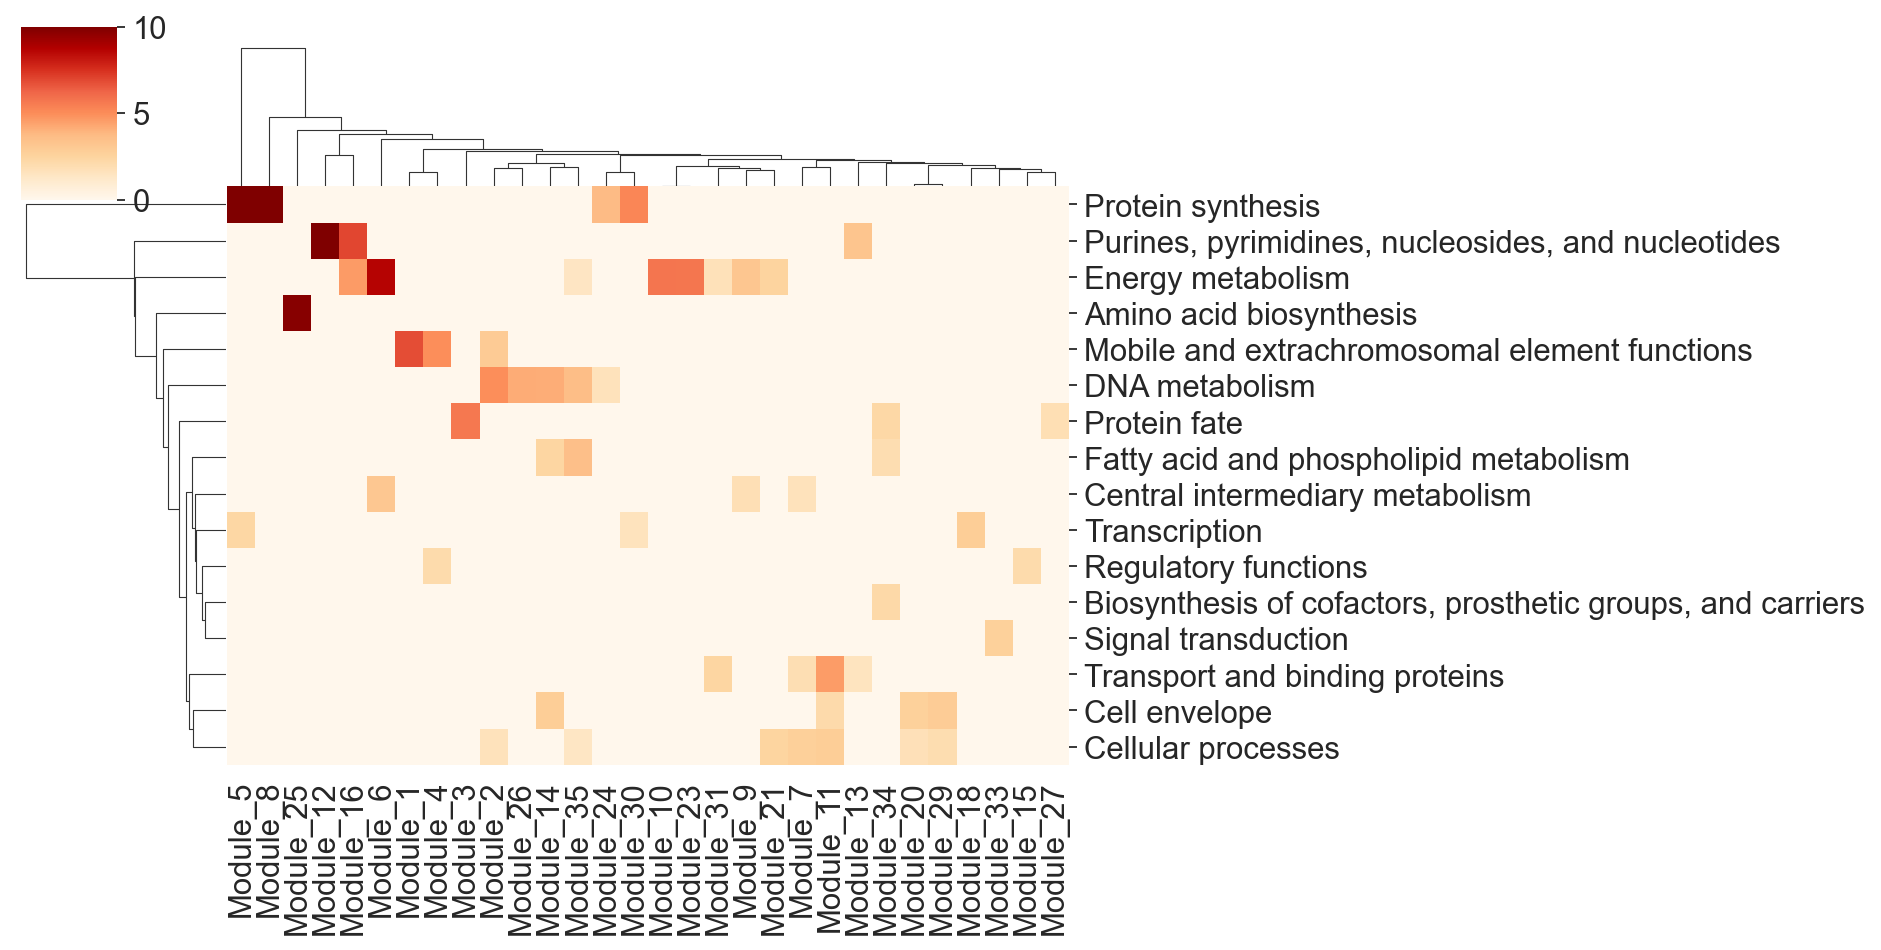

In [76]:
sns.clustermap(-np.log10(all_results), cmap="OrRd", vmax=10, figsize=(12,6))
plt.savefig("module36_main.pdf")

In [44]:
# --- Sankey with function gaps & colors, gapless right color bar, PDF export ---

# pip install -U plotly kaleido matplotlib
import re, numpy as np, pandas as pd, plotly.graph_objects as go
from collections.abc import Sequence
try:
    import plotly.express as px
except Exception:
    px = None
try:
    from matplotlib.colors import to_rgb as mpl_to_rgb
except Exception:
    mpl_to_rgb = None

# Inputs in memory:
#   enrich : wide DataFrame of p-values (rows=function terms, cols like 'Module_31' or 'Module 31')
enrich=all_results
#   cols   : module labels in your heatmap order (e.g., ['Module 31','Module 21',...])
#   mod_color_map : {module_id: color} (hex, rgb/rgba, named, or tuple 0..1/0..255)

def parse_modnum(label):
    m = re.search(r'(\d+)$', str(label))
    if not m: raise ValueError(f"Cannot parse module number from: {label}")
    return int(m.group(1))

def color_to_css(c, alpha=1.0):
    """Return 'rgba(r,g,b,a)' from hex/rgb(a)/named/(r,g,b)0..1/0..255."""
    if isinstance(c, str):
        s = c.strip(); low = s.lower()
        if low.startswith("rgba(") or low.startswith("rgb("):
            return s
        if s.startswith("#"):
            h = s.lstrip("#"); 
            if len(h)==3: h="".join(ch*2 for ch in h)
            r=int(h[0:2],16); g=int(h[2:4],16); b=int(h[4:6],16)
            return f"rgba({r},{g},{b},{alpha})"
        if mpl_to_rgb is not None:
            r,g,b = mpl_to_rgb(s)
            return f"rgba({int(round(r*255))},{int(round(g*255))},{int(round(b*255))},{alpha})"
        raise ValueError(f"Unrecognized color string: {c}")
    if isinstance(c, Sequence) and (3 <= len(c) <= 4):
        r,g,b = c[0],c[1],c[2]
        if max(r,g,b) <= 1.0: r,g,b = int(round(r*255)), int(round(g*255)), int(round(b*255))
        else: r,g,b = int(round(r)), int(round(g)), int(round(b))
        return f"rgba({r},{g},{b},{alpha})"
    raise TypeError(f"Unsupported color type: {type(c)}")

# 1) Module order & color map normalization
module_order = [parse_modnum(c) for c in cols]
if not all(isinstance(k, int) for k in mod_color_map.keys()):
    mod_color_map = {parse_modnum(k): v for k, v in mod_color_map.items()}

# 2) Long-format enrichment with numeric module id
enrich_long = (enrich.reset_index().rename(columns={'index':'term'})
                        .melt(id_vars='term', var_name='module_col', value_name='p'))
enrich_long['module'] = enrich_long['module_col'].str.extract(r'(\d+)$').astype(int)
enrich_long = enrich_long[enrich_long['module'].isin(module_order)].copy()

# 3) Filter & link size = −log10(p)
p_thresh = 0.05
enrich_long['p'] = (enrich_long['p']
                    .replace([np.inf,-np.inf], np.nan)
                    .clip(lower=np.finfo(float).tiny, upper=1.0))
enrich_long = enrich_long.dropna(subset=['p'])
enrich_long['value'] = -np.log10(enrich_long['p'])
enrich_long = enrich_long.loc[enrich_long['p'] <= p_thresh]

# Limit clutter: top N terms per module
top_n_per_module = 5
enrich_long = (enrich_long.sort_values(['module','p','value'], ascending=[True, True, False])
                           .groupby('module', group_keys=False).head(top_n_per_module))

# 4) Build node lists
funcs = list(pd.Index(enrich_long['term']).unique())
mods  = [m for m in module_order if m in set(enrich_long['module'])]

func_index = {f:i for i,f in enumerate(funcs)}
mod_index  = {m:i+len(funcs) for i,m in enumerate(mods)}

# 4a) Function colors: distinct palette
if px is not None:
    pal = px.colors.qualitative.Set3 + px.colors.qualitative.Set2 + px.colors.qualitative.Plotly
else:
    # fallback hex list
    pal = ['#8DD3C7','#FFFFB3','#BEBADA','#FB8072','#80B1D3','#FDB462','#B3DE69',
           '#FCCDE5','#D9D9D9','#BC80BD','#CCEBC5','#FFED6F',
           '#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']
func_color_map = {f: pal[i % len(pal)] for i,f in enumerate(funcs)}

node_labels = funcs + [f"Module {m}" for m in mods]
# Left column: function colors; right column: transparent nodes (we’ll draw a custom gapless bar)
#node_colors = [color_to_css(func_color_map[f], 1.0) for f in funcs] + ["rgba(0,0,0,0)"]*len(mods)
# colors: left = distinct function colors; right = your module colors (VISIBLE)
node_colors = (
    [color_to_css(func_color_map[f], 1.0) for f in funcs] +
    [color_to_css(mod_color_map[m], 1.0) for m in mods]
)
# 4b) Positions — make **visible gaps** between functions on the left
# Use many evenly spaced centers; small thickness ensures gaps are obvious.
node_x_left, node_x_right = 0.0, 0.9
node_x = [node_x_left]*len(funcs) + [node_x_right]*len(mods)

# space functions with gaps:
if len(funcs) <= 1:
    func_y = [0.5]
else:
    # shrink the used vertical range to create larger visible gaps
    # e.g., leave 20% headroom; increase 'gap_scale' (<1 = more compact nodes = bigger gaps)
    gap_scale = 0.75
    ys = np.linspace(0.05, 0.95, num=len(funcs))
    mid = 0.5
    func_y = (mid + (ys - mid)*gap_scale).tolist()

# For modules, stack by total flow (so bar segments are proportional), then align centers
tot_by_mod = enrich_long.groupby('module')['value'].sum().reindex(mods).fillna(0.0)
frac = (tot_by_mod / tot_by_mod.sum()).values if tot_by_mod.sum() > 0 else np.repeat(1.0/len(mods), len(mods))
cum = np.cumsum(np.concatenate([[0], frac]))
mod_y = [ (cum[i] + cum[i+1])/2.0 for i in range(len(frac)) ]

node_y = func_y + mod_y

# 5) Links (function → module); keep link colors by module to match right bar
sources, targets, values, link_colors = [], [], [], []
for _, r in enrich_long.iterrows():
    f, m = r['term'], int(r['module'])
    if f in func_index and m in mod_index:
        sources.append(func_index[f])
        targets.append(mod_index[m])
        values.append(float(r['value']))
        link_colors.append(color_to_css(mod_color_map[m], 0.35))

if not values:
    raise ValueError("No significant pairs after filtering. Increase p_thresh or top_n_per_module.")

# 6) Sankey (use pad to enhance left-column gaps; right nodes transparent anyway)
fig = go.Figure(data=[go.Sankey(
    arrangement="fixed",
    node=dict(
        pad=1,                # <-- adds visible gaps between nodes in a column
        thickness=20,          # thinner nodes -> gaps look larger
        line=dict(color="rgba(0,0,0,0)", width=0),
        label=node_labels,
        color=node_colors,
        x=node_x, y=node_y
    ),
    link=dict(source=sources, target=targets, value=values, color=link_colors),
    domain=dict(x=[0.0, 1.0], y=[0.0, 1.0])
)])

fig.update_layout(
    title="Function → Module enrichment (link width = −log10 p)",
    font=dict(size=12),
    margin=dict(l=10, r=120, t=40, b=10),
    width=980, height=700
)

# 8) Show & Save to PDF (vector)
fig.show()


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [45]:
#Save as an html file, then print the html file to pdf
fig.write_html("function_to_module_sankey.html", include_plotlyjs="cdn")

Plot the gene-gene correlation heatmap so that the module orders are the same

In [ ]:
# 1) parse module order from `cols`
import re
def parse_module_number(s):
    m = re.search(r'(\d+)$', str(s))
    if not m:
        raise ValueError(f"Could not parse module number from: {s}")
    return int(m.group(1))

module_order = [parse_module_number(c) for c in cols]
order_map = {m: i for i, m in enumerate(module_order)}
order_map

{31: 0,
 21: 1,
 25: 2,
 12: 3,
 17: 4,
 14: 5,
 7: 6,
 6: 7,
 10: 8,
 15: 9,
 28: 10,
 9: 11,
 35: 12,
 33: 13,
 16: 14,
 23: 15,
 19: 16,
 26: 17,
 5: 18,
 13: 19,
 8: 20,
 30: 21,
 32: 22,
 24: 23,
 18: 24,
 11: 25,
 2: 26,
 1: 27,
 4: 28,
 36: 29,
 34: 30,
 20: 31,
 3: 32,
 29: 33,
 22: 34,
 27: 35}

In [ ]:
# 2) filter & order genes by module (exclude -1 unless you included it in module_order)
modules_series = hs.modules.dropna().astype(int)
mods_filtered = modules_series[modules_series.isin(module_order)]

df_mod = (
    mods_filtered.rename('module').to_frame()
    .assign(
        gene=lambda d: d.index,                     # tie-breaker
        module_order=lambda d: d['module'].map(order_map)
    )
    .sort_values(['module_order', 'gene'], kind='mergesort')
)

genes_ordered = df_mod.index.tolist()
genes_ordered.head()

In [ ]:
# 3) intersect with correlation matrix
corr = hs.local_correlation_z
common = [g for g in genes_ordered if g in corr.index and g in corr.columns]
corr_sub = corr.loc[common, common]
corr_sub.head()

In [ ]:
# 4) colors and plot the gene-gene correlation heatmap
from matplotlib.patches import Patch

palette=['#B5C3D7','#B6C9C0','#DCDE99','#DDCCDE','#E1B3B0','#DFC97F', '#D7A6A2','#AE7674','#C7DEBE',
         '#D2D6DE','#E2A27A','#AFC8DE','#8EAFC4','#7B9EB1','#C3A3C2','#E8C7C3',
         '#6A8E9F','#4C6E7D','#BDDEDE','#9AC9CC','#B1D4A7','#F4D35E','#F4A261','#E4AEAE','#BCA48E',
         "#E38871",'#D6BE98','#DCCECB','#BE938D',
         '#8282AF',"#A2677C",'#DECDAE',"#E3A1C8",'#E8CF72','#BEB5A4',
         '#BDD8FC',
         ]
mod_color_map = {m: palette[i % len(palette)] for i, m in enumerate(module_order)}
mod_for_gene = modules_series.loc[common]
rowcol_colors = mod_for_gene.map(mod_color_map)

g = sns.clustermap(
    corr_sub,
    row_cluster=False, col_cluster=False,
    cmap="vlag", center=0, vmin=-12, vmax=12,
    xticklabels=False, yticklabels=False,
    row_colors=rowcol_colors, col_colors=rowcol_colors,
    figsize=(13,13)
)

handles = [
    Patch(facecolor=mod_color_map[m], edgecolor="none", label=f"Module {m}")
    for m in module_order if (mod_for_gene == m).any()
]
leg = g.ax_heatmap.legend(
    handles=handles, title="Module",
    loc="center left", bbox_to_anchor=(1.02, 0.5),  # outside on the right
    frameon=False, ncol=1, borderaxespad=0.0, handlelength=1.2, handletextpad=0.4
)
g.fig.subplots_adjust(right=0.82)  # make room on the right (tune this)

plt.tight_layout()
plt.savefig("hotspot_correlation_sorted_heatmap.pdf")
plt.show()

## Look at each cluster separately

In [46]:
#Group by cluster and calculate the mean of each module
sample_module_avg_L = adata[adata.obs['cluster']=='L'].obs.groupby('sample')[module_cols].mean()
sample_module_avg_L

,Module 1,Module 2,Module 3,Module 4,Module 5,Module 6,Module 7,Module 8,Module 9,Module 10,...,Module 27,Module 28,Module 29,Module 30,Module 31,Module 32,Module 33,Module 34,Module 35,Module 36
sample,,,,,,,,,,,,,,,,,,,,,
1r,-0.047510,-0.055872,1.331624,-0.029921,-1.222005,0.605884,0.844444,-0.663247,0.602434,1.000058,...,0.278028,0.123811,0.234273,-0.170521,0.209519,-0.158185,0.232625,-0.013202,0.209315,0.094278
2r,-0.054710,-0.055197,-0.524661,-0.040420,0.075374,0.071725,-0.234404,0.073243,-0.188090,-0.261924,...,-0.082043,-0.046720,-0.082749,-0.038040,-0.089172,-0.079958,-0.118317,-0.055660,-0.027210,-0.080977
3r,-0.056851,-0.060788,-0.649349,-0.054423,0.774609,-0.072026,-0.400393,0.232846,-0.312268,-0.400273,...,-0.162819,-0.111365,-0.148332,0.019330,-0.057285,0.024149,-0.184144,-0.076130,-0.147766,-0.107942
4r,-0.053151,-0.060971,-0.426020,-0.050627,0.407395,-0.451914,-0.244951,0.294425,-0.020096,-0.262100,...,-0.038147,0.041674,-0.014118,0.166064,-0.040147,0.084051,0.036487,0.171227,0.058406,0.005947


In [47]:
#Group by cluster and calculate the mean of each module
sample_module_avg_M = adata[adata.obs['cluster']=='M'].obs.groupby('sample')[module_cols].mean()
sample_module_avg_M

,Module 1,Module 2,Module 3,Module 4,Module 5,Module 6,Module 7,Module 8,Module 9,Module 10,...,Module 27,Module 28,Module 29,Module 30,Module 31,Module 32,Module 33,Module 34,Module 35,Module 36
sample,,,,,,,,,,,,,,,,,,,,,
1r,-0.039714,-0.048930,-0.103363,-0.006253,-0.175851,0.015017,0.091326,-0.139874,0.198831,0.001638,...,0.055637,0.107082,0.073054,0.012790,0.012437,0.037682,0.127957,0.047048,0.011120,0.077438
2r,-0.051132,-0.047366,-0.601800,-0.015096,0.486143,-0.335367,-0.251364,0.238010,-0.182140,-0.465103,...,-0.097287,-0.054275,-0.111336,-0.135803,-0.133290,-0.010817,-0.071348,-0.063189,-0.074956,-0.063276
3r,-0.058652,-0.056144,-0.710522,-0.051828,1.151418,-0.425189,-0.405984,0.398446,-0.465193,-0.512519,...,-0.210147,-0.149171,-0.198937,0.050848,-0.106632,0.133196,-0.173925,-0.140683,-0.271534,-0.095477
4r,-0.055048,-0.056905,-0.506313,-0.052575,0.593854,-0.505518,-0.162924,0.380801,-0.075107,-0.332813,...,-0.076442,0.026999,-0.050818,0.174413,-0.067817,0.173260,0.086941,0.088017,-0.063738,0.023872


Zavit at subset average data for visualization

In [48]:
sum((sample_module_avg_L.max()-sample_module_avg_L.min())>0.4)

20

In [49]:
df = sample_module_avg_L.loc[:,(sample_module_avg_L.max()-sample_module_avg_L.min())>0.4]
df

,Module 3,Module 5,Module 6,Module 7,Module 8,Module 9,Module 10,Module 12,Module 13,Module 14,Module 15,Module 16,Module 17,Module 19,Module 20,Module 21,Module 22,Module 24,Module 27,Module 33
sample,,,,,,,,,,,,,,,,,,,,
1r,1.331624,-1.222005,0.605884,0.844444,-0.663247,0.602434,1.000058,0.402913,-0.354817,0.466938,0.427329,-0.244858,0.353263,-0.334793,0.263415,0.353172,0.405484,-0.295117,0.278028,0.232625
2r,-0.524661,0.075374,0.071725,-0.234404,0.073243,-0.188090,-0.261924,0.643426,-0.040529,-0.188767,-0.056590,0.178668,-0.132600,0.093832,-0.158271,-0.063678,-0.110318,0.063666,-0.082043,-0.118317
3r,-0.649349,0.774609,-0.072026,-0.400393,0.232846,-0.312268,-0.400273,0.134024,-0.017695,-0.279217,-0.099434,0.248341,-0.198241,0.176649,-0.245852,-0.123594,-0.195122,0.094279,-0.162819,-0.184144
4r,-0.426020,0.407395,-0.451914,-0.244951,0.294425,-0.020096,-0.262100,0.059251,0.366436,0.050622,-0.206878,0.012733,0.001975,0.213065,0.074595,-0.146924,-0.109460,0.113428,-0.038147,0.036487


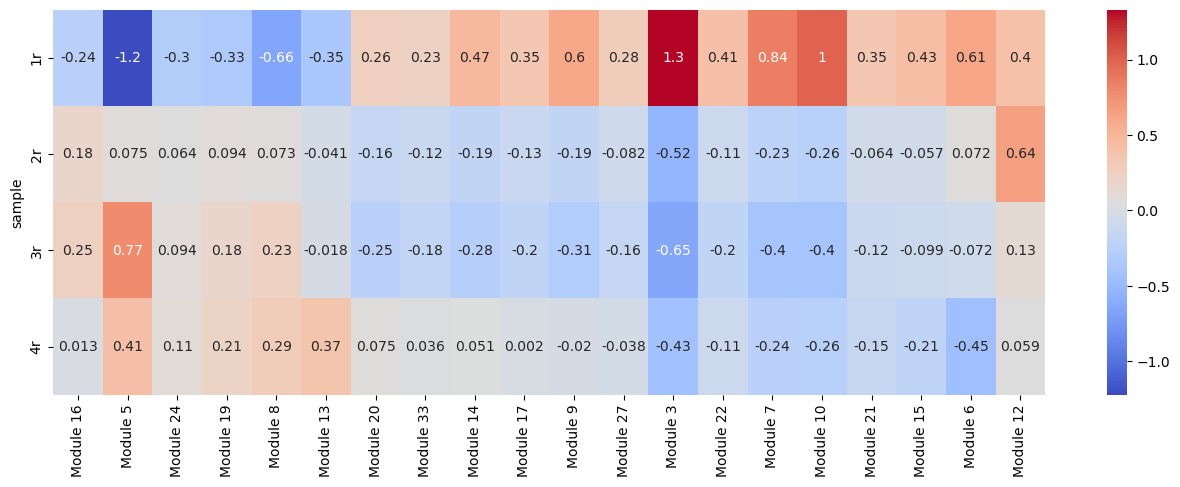

In [50]:
pca = PCA(n_components=4)  # Adjust the number of components as needed
pca_results = pca.fit_transform(df)
arctan = pd.DataFrame((np.arctan2(np.array(pca.components_[0,:]), np.array(pca.components_[1,:]))),
                    index=df.columns,
                   columns=['arctan'])
sorted_df = df.loc[:,arctan.sort_values(by="arctan").index]
sorted_df

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df, 
            annot=True,
            cmap="coolwarm")
plt.grid(False)

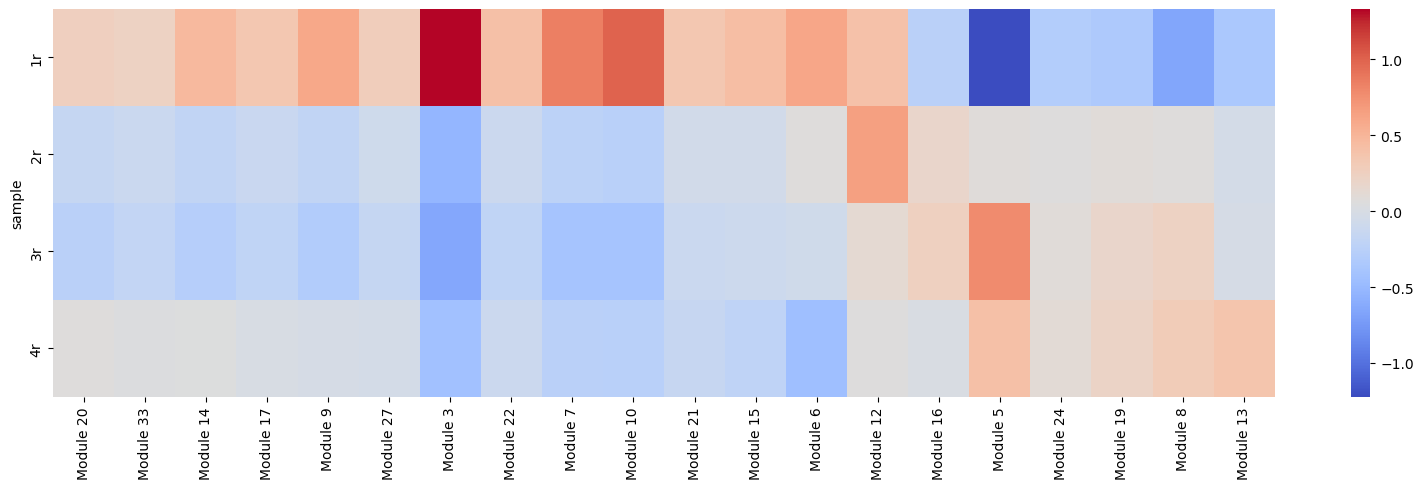

In [52]:
n=6; #The first 8 columns should be moved to the back
cols = sorted_df.columns.tolist()

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df[cols[n:] + cols[:n]], 
            annot=False,
            cmap="coolwarm")
plt.grid(False)
plt.tight_layout()
plt.savefig("clusterL_subset_zavit_sample_module_score.pdf")

In [54]:
sum((sample_module_avg_M.max()-sample_module_avg_M.min())>0.4)

10

In [55]:
df = sample_module_avg_M.loc[:,(sample_module_avg_M.max()-sample_module_avg_M.min())>0.4]
df

,Module 3,Module 5,Module 6,Module 7,Module 8,Module 9,Module 10,Module 13,Module 14,Module 20
sample,,,,,,,,,,
1r,-0.103363,-0.175851,0.015017,0.091326,-0.139874,0.198831,0.001638,0.085057,0.116581,0.203127
2r,-0.601800,0.486143,-0.335367,-0.251364,0.238010,-0.182140,-0.465103,0.098273,-0.389473,-0.166906
3r,-0.710522,1.151418,-0.425189,-0.405984,0.398446,-0.465193,-0.512519,0.062696,-0.366665,-0.247381
4r,-0.506313,0.593854,-0.505518,-0.162924,0.380801,-0.075107,-0.332813,0.473502,-0.026456,0.109808


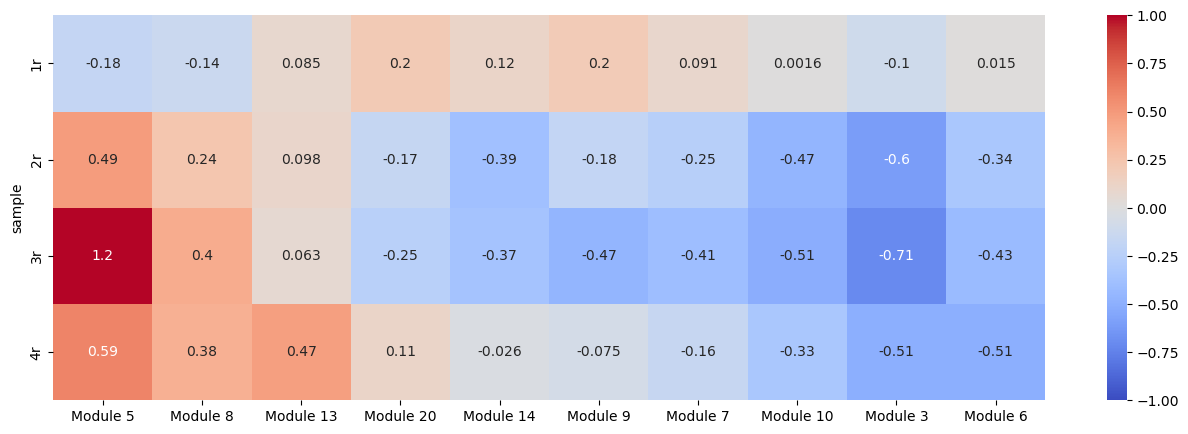

In [58]:
pca = PCA(n_components=4)  # Adjust the number of components as needed
pca_results = pca.fit_transform(df)
arctan = pd.DataFrame((np.arctan2(np.array(pca.components_[0,:]), np.array(pca.components_[1,:]))),
                    index=df.columns,
                   columns=['arctan'])
sorted_df = df.loc[:,arctan.sort_values(by="arctan").index]
sorted_df

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df, 
            annot=True,
            vmin=-1, vmax=1,
            cmap="coolwarm")
plt.grid(False)

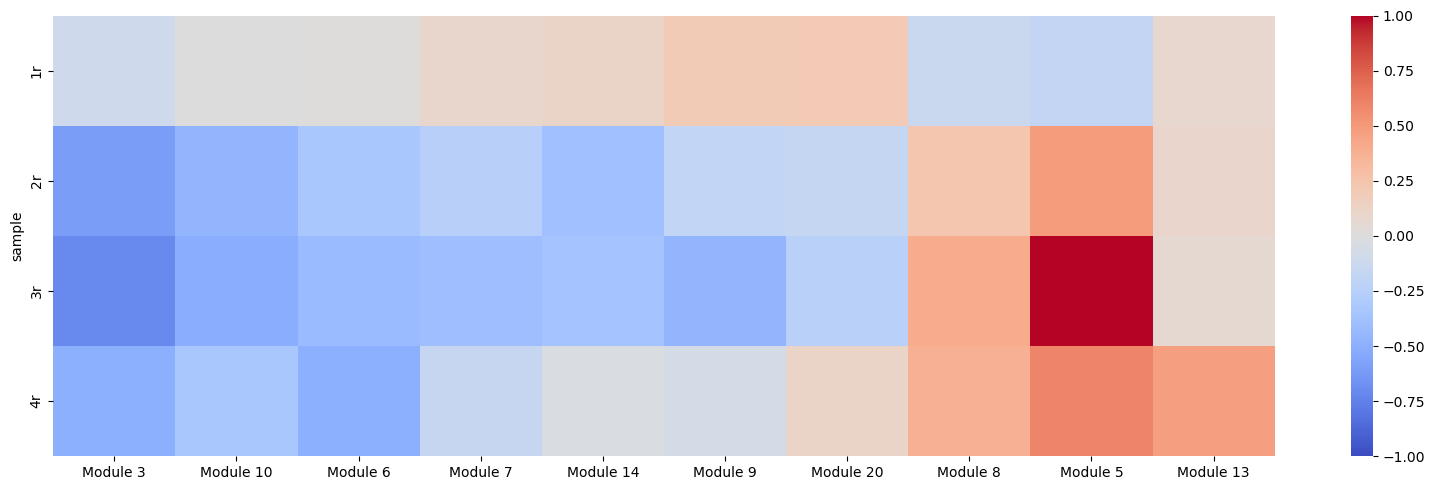

In [61]:
cols= ['Module 3',
       'Module 10',
 'Module 6',
 'Module 7',
 'Module 14',
 'Module 9',
 'Module 20',
 'Module 8',
 'Module 5',
 'Module 13',
 ]

plt.figure(figsize = (16,5))
sns.heatmap(sorted_df[cols], 
            annot=False,
            vmin=-1, vmax=1,
            cmap="coolwarm")
plt.grid(False)
plt.tight_layout()
plt.savefig("clusterM_subset_zavit_sample_module_score.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


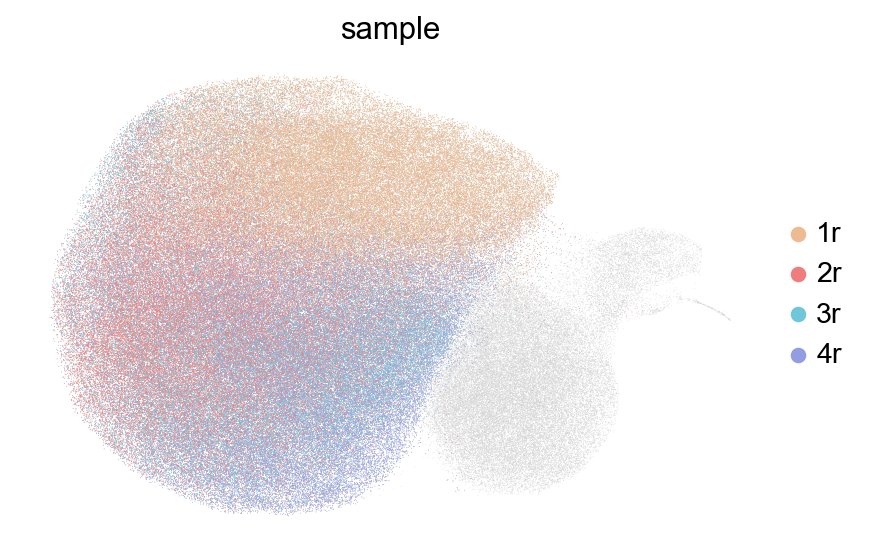

In [67]:
sc.set_figure_params(figsize=(6, 4))

# Create a new figure and axis
fig, ax = plt.subplots()

# First, plot the general UMAP without showing it (show=False)
sc.pl.umap(adata, show=False, ax=ax)

# Then, plot the UMAP for the subset of data with custom colors on the same axis
sc.pl.umap(adata[adata.obs['cluster'] == 'L'],
           color="sample",
           palette=["#EDBB91", "#EF7D7D", "#70C7DA", "#939EE2"],           
           ax=ax,
           frameon=False,
          save="L_sample.pdf")

PCA on cluster M modules scores

In [60]:
#1. Extract the module scores for cluster 'M'
M_module = adata[adata.obs['cluster']=='M'].obs[module_cols].values.astype(float)

# 2. Standardize (zero mean, unit variance)
scaler = StandardScaler()
M_scaled = pd.DataFrame(scaler.fit_transform(M_module),
                        index=adata[adata.obs['cluster']=='M'].obs_names,
                        columns=module_cols)

# 3. Run PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(M_scaled)

In [61]:
pca.explained_variance_ratio_

array([0.24735618, 0.12713254, 0.10106188, 0.08227158, 0.0621078 ,
       0.05084969, 0.04057869, 0.0292621 , 0.02504686, 0.02353822])

In [62]:
adata_M = adata[adata.obs['cluster']=='M'].copy()
adata_M.obsm['X_pca'] = pca_results

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' wil

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


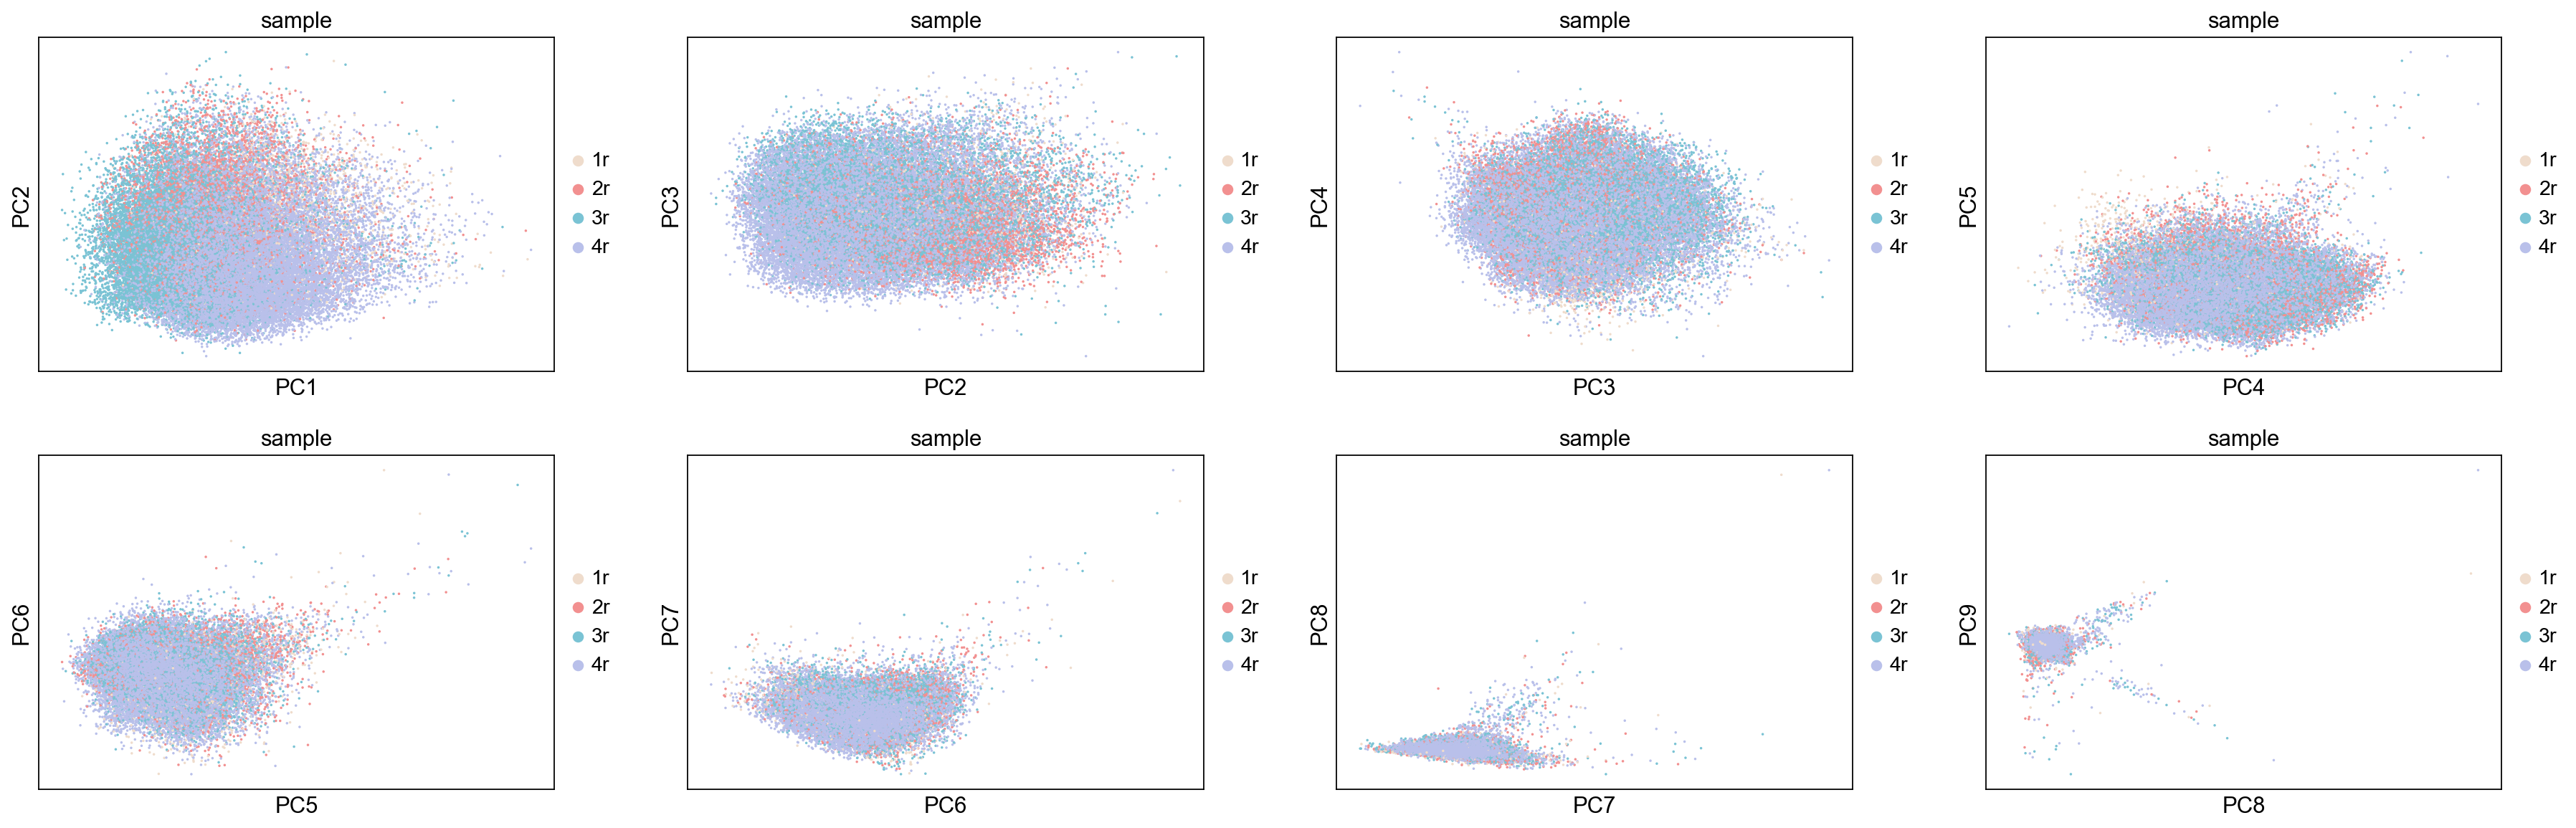

In [63]:
sc.pl.pca(adata_M, color='sample', components=['1,2', '2,3', '3,4', '4,5','5,6','6,7','7,8','8,9'],
          size=10, #adjust cell point size
          palette=["#EFDCCC", "#F29090", "#7AC3D4", "#B9C0EA"],
          save="clusterM_module_PCA_sample.pdf")